# UTSC Machine Learning Workshop 
## Introduction to Linear Regression

*Adapted from Chapter 3 of [An Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/)*

## Motivation

**Regression problems** are supervised learning problems in which the response is continuous. **Classification problems** are supervised learning problems in which the response is categorical. **Linear regression** is a technique that is useful for regression problems.

So, why are we learning linear regression?

- widely used
- runs fast
- easy to use (not a lot of tuning required)
- highly interpretable
- basis for many other methods

## Libraries

We'll be using [scikit-learn](http://scikit-learn.org/stable/) since it provides significantly more useful functionality for machine learning in general.

In [126]:
# imports
import pandas as pd
import seaborn as sns
#import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np

# allow plots to appear directly in the notebook
%matplotlib inline

## Example: Advertising Data

Let's take a look at some data, ask some questions about that data, and then use linear regression to answer those questions!

In [127]:
# read data into a DataFrame
data = pd.read_csv('data/Advertising.csv', index_col=0)
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


What are the **features**?
- TV: advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- Radio: advertising dollars spent on Radio
- Newspaper: advertising dollars spent on Newspaper

What is the **response**?
- Sales: sales of a single product in a given market (in thousands of widgets)

In [128]:
# print the shape of the DataFrame
data.shape

(200, 4)

There are 200 **observations**, and thus 200 markets in the dataset.

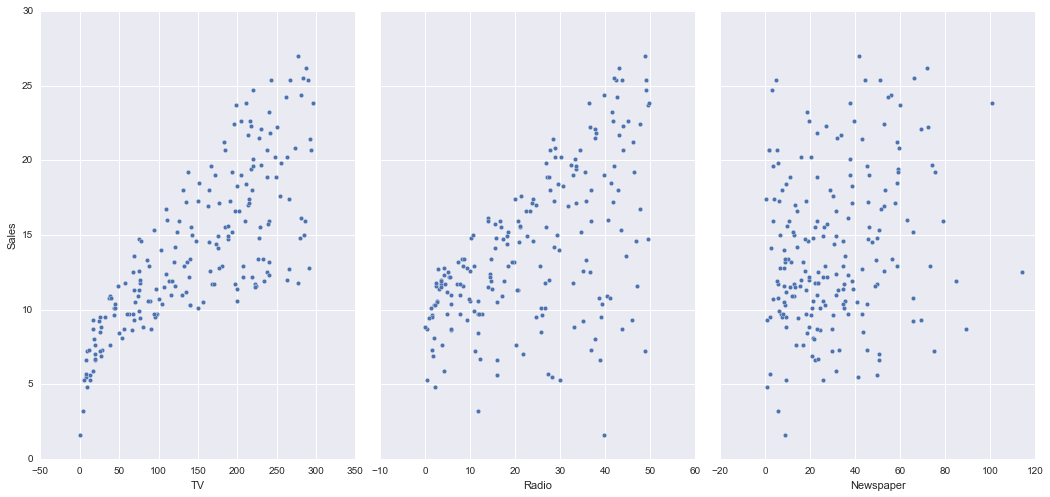

In [129]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', size=7, aspect=0.7)

## Questions About the Advertising Data

Let's pretend you work for the company that manufactures and markets this widget. The company might ask you the following: On the basis of this data, how should we spend our advertising money in the future?

This general question might lead you to more specific questions:
1. Is there a relationship between ads and sales?
2. How strong is that relationship?
3. Which ad types contribute to sales?
4. What is the effect of each ad type of sales?
5. Given ad spending in a particular market, can sales be predicted?

We will explore these questions below!

## Simple Linear Regression

Simple linear regression is an approach for predicting a **quantitative response** using a **single feature** (or "predictor" or "input variable"). It takes the following form:

$y = \beta_0 + \beta_1x$

What does each term represent?
- $y$ is the response
- $x$ is the feature
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for x

Together, $\beta_0$ and $\beta_1$ are called the **model coefficients**. To create your model, you must "learn" the values of these coefficients. And once we've learned these coefficients, we can use the model to predict Sales!

## Estimating ("Learning") Model Coefficients

Generally speaking, coefficients are estimated using the **least squares criterion**, which means we are find the line (mathematically) which minimizes the **sum of squared residuals** (or "sum of squared errors"):

![Estimating coefficients](images/estimating_coefficients.png)

What elements are present in the diagram?
- The black dots are the **observed values** of x and y.
- The blue line is our **least squares line**.
- The red lines are the **residuals**, which are the distances between the observed values and the least squares line.

How do the model coefficients relate to the least squares line?
- $\beta_0$ is the **intercept** (the value of $y$ when $x$=0)
- $\beta_1$ is the **slope** (the change in $y$ divided by change in $x$)

Here is a graphical depiction of those calculations:

![Slope-intercept](images/slope_intercept.png)

Let's estimate the model coefficients for the advertising data:

In [130]:
### SCIKIT-LEARN ###

# create X and y
feature_cols = ['TV']
X = data[feature_cols]
y = data.Sales

# instantiate and fit
lm = LinearRegression()
lm.fit(X, y)

# print the coefficients
print lm.intercept_
print lm.coef_

7.03259354913
[ 0.04753664]


## Interpreting Model Coefficients

How do we interpret the TV coefficient ($\beta_1$)?
- A "unit" increase in TV ad spending is **associated with** a 0.047537 "unit" increase in Sales.
- Or more clearly: An additional $1,000 spent on TV ads is **associated with** an increase in sales of 47.537 widgets.

Note that if an increase in TV ad spending was associated with a **decrease** in sales, $\beta_1$ would be **negative**.

## Using the Model for Prediction

Let's say that there was a new market where the TV advertising spend was **$50,000**. What would we predict for the Sales in that market?

$$y = \beta_0 + \beta_1x$$
$$y = 7.032594 + 0.047537 \times 50$$

In [131]:
# manually calculate the prediction
7.032594 + 0.047537*50

9.409444

In [132]:
### SCIKIT-LEARN ###

# predict for a new observation
lm.predict(50)

array([ 9.40942557])

Thus, we would predict Sales of **9,409 widgets** in that market.

## Plotting the Least Squares Line

Let's plot the least squares line for Sales versus each of the features:

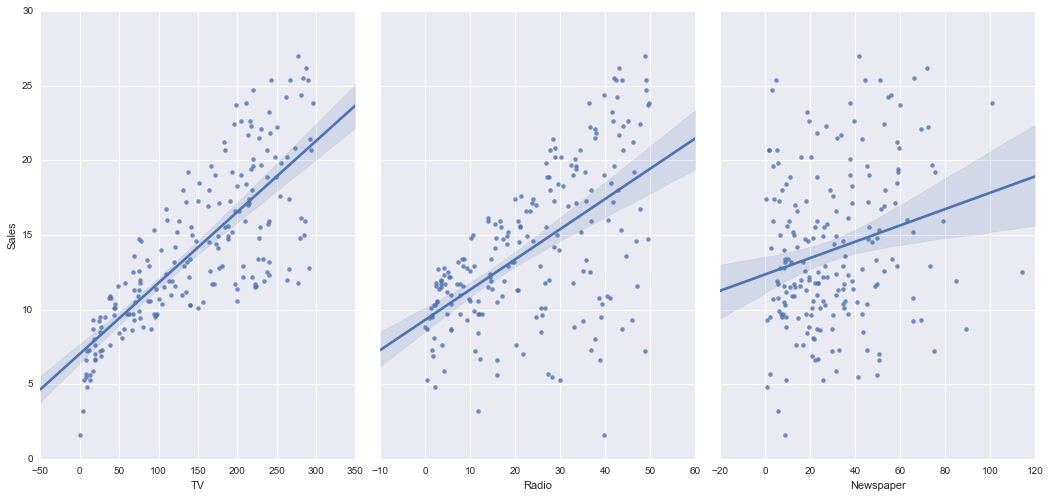

In [133]:
sns.pairplot(data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', size=7, aspect=0.7, kind='reg')

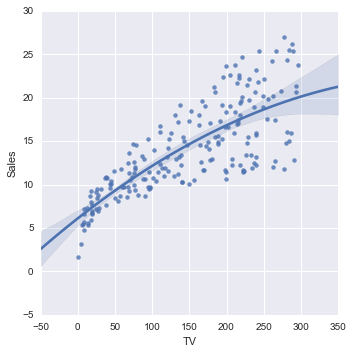

In [156]:
#A.S. You can have different order poly to fit. The CI sets the confidence interval
sns.lmplot(data=data, x='TV', y='Sales', order=2, ci = 95)

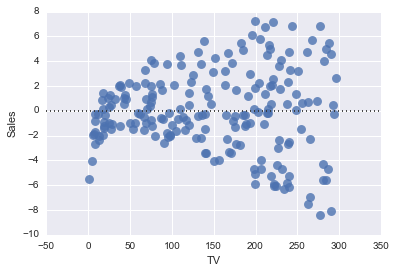

In [146]:
#A.S. you can also plot the residuals of the fit. If there is leftover structure it implies not a good fit
sns.residplot(x="TV", y="Sales", data=data, order = 1, scatter_kws={"s": 80})

## Multiple Linear Regression

Simple linear regression can easily be extended to include multiple features. This is called **multiple linear regression**:

$y = \beta_0 + \beta_1x_1 + ... + \beta_nx_n$

Each $x$ represents a different feature, and each feature has its own coefficient. In this case:

$y = \beta_0 + \beta_1 \times TV + \beta_2 \times Radio + \beta_3 \times Newspaper$

Let's estimate these coefficients:

In [55]:
### SCIKIT-LEARN ###

# create X and y
feature_cols = ['TV', 'Radio', 'Newspaper']
X = data[feature_cols]
y = data.Sales

# instantiate and fit
lm = LinearRegression()
lm.fit(X, y)

# print the coefficients
print lm.intercept_
print lm.coef_

2.93888936946
[ 0.04576465  0.18853002 -0.00103749]


In [56]:
# pair the feature names with the coefficients
zip(feature_cols, lm.coef_)

[('TV', 0.045764645455397608),
 ('Radio', 0.18853001691820462),
 ('Newspaper', -0.0010374930424762972)]

How do we interpret these coefficients? For a given amount of Radio and Newspaper ad spending, an **increase of $1000 in TV ad spending** is associated with an **increase in Sales of 45.765 widgets**.

A lot of the information we have been reviewing piece-by-piece is available in the Statsmodels model summary output:

## Feature Selection

How do I decide **which features to include** in a linear model? 

-the answer will be in the next session. 

## Handling Categorical Features with Two Categories

Up to now, all of our features have been numeric. What if one of our features was categorical?

Let's create a new feature called **Size**, and randomly assign observations to be **small or large**:

In [57]:
# set a seed for reproducibility
np.random.seed(12345)

# create a Series of booleans in which roughly half are True
nums = np.random.rand(len(data))
mask_large = nums > 0.5

# initially set Size to small, then change roughly half to be large
#A.S. First set everything to small, then use the mask_large condition to change appropriate entries to large. 
data['Size'] = 'small'
data.loc[mask_large, 'Size'] = 'large'
data.head()

,TV,Radio,Newspaper,Sales,Size
1,230.1,37.8,69.2,22.1,large
2,44.5,39.3,45.1,10.4,small
3,17.2,45.9,69.3,9.3,small
4,151.5,41.3,58.5,18.5,small
5,180.8,10.8,58.4,12.9,large


For scikit-learn, we need to represent all data **numerically**. If the feature only has two categories, we can simply create a **dummy variable** that represents the categories as a binary value:

In [58]:
# create a new Series called Size_large
data['Size_large'] = data.Size.map({'small':0, 'large':1})
data.head()

,TV,Radio,Newspaper,Sales,Size,Size_large
1,230.1,37.8,69.2,22.1,large,1
2,44.5,39.3,45.1,10.4,small,0
3,17.2,45.9,69.3,9.3,small,0
4,151.5,41.3,58.5,18.5,small,0
5,180.8,10.8,58.4,12.9,large,1


Let's redo the multiple linear regression and include the **Size_large** feature:

In [59]:
# create X and y
feature_cols = ['TV', 'Radio', 'Newspaper', 'Size_large']
X = data[feature_cols]
y = data.Sales

# instantiate, fit
lm = LinearRegression()
lm.fit(X, y)

# print coefficients
zip(feature_cols, lm.coef_)

[('TV', 0.045719820924362775),
 ('Radio', 0.18872814313427869),
 ('Newspaper', -0.0010976794483516079),
 ('Size_large', 0.0574238508548277)]

How do we interpret the **Size_large coefficient**? For a given amount of TV/Radio/Newspaper ad spending, being a large market is associated with an average **increase** in Sales of 57.42 widgets (as compared to a small market, which is called the **baseline level**).

What if we had reversed the 0/1 coding and created the feature 'Size_small' instead? The coefficient would be the same, except it would be **negative instead of positive**. As such, your choice of category for the baseline does not matter, all that changes is your **interpretation** of the coefficient.

## Handling Categorical Features with More than Two Categories

Let's create a new feature called **Area**, and randomly assign observations to be **rural, suburban, or urban**:

In [60]:
# set a seed for reproducibility
np.random.seed(123456)

# assign roughly one third of observations to each group
nums = np.random.rand(len(data))
mask_suburban = (nums > 0.33) & (nums < 0.66)
mask_urban = nums > 0.66
data['Area'] = 'rural'
data.loc[mask_suburban, 'Area'] = 'suburban'
data.loc[mask_urban, 'Area'] = 'urban'
data.head()

,TV,Radio,Newspaper,Sales,Size,Size_large,Area
1,230.1,37.8,69.2,22.1,large,1,rural
2,44.5,39.3,45.1,10.4,small,0,urban
3,17.2,45.9,69.3,9.3,small,0,rural
4,151.5,41.3,58.5,18.5,small,0,urban
5,180.8,10.8,58.4,12.9,large,1,suburban


We have to represent Area numerically, but we can't simply code it as 0=rural, 1=suburban, 2=urban because that would imply an **ordered relationship** between suburban and urban, and thus urban is somehow "twice" the suburban category. Note that if you do have ordered categories (i.e., strongly disagree, disagree, neutral, agree, strongly agree), you can use a single dummy variable and represent the categories numerically (such as 1, 2, 3, 4, 5).

Anyway, our Area feature is unordered, so we have to create **additional dummy variables**. Let's explore how to do this using pandas:

In [61]:
# create three dummy variables using get_dummies
pd.get_dummies(data.Area, prefix='Area').head()

,Area_rural,Area_suburban,Area_urban
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1
5,0,1,0


However, we actually only need **two dummy variables, not three**. Why? Because two dummies captures all of the "information" about the Area feature, and implicitly defines rural as the "baseline level".

Let's see what that looks like:

In [62]:
# create three dummy variables using get_dummies, then exclude the first dummy column
area_dummies = pd.get_dummies(data.Area, prefix='Area').iloc[:, 1:]
area_dummies.head()

,Area_suburban,Area_urban
1,0,0
2,0,1
3,0,0
4,0,1
5,1,0


Here is how we interpret the coding:
- **rural** is coded as Area_suburban=0 and Area_urban=0
- **suburban** is coded as Area_suburban=1 and Area_urban=0
- **urban** is coded as Area_suburban=0 and Area_urban=1

If this is confusing, think about why we only needed one dummy variable for Size (Size_large), not two dummy variables (Size_small and Size_large). In general, if you have a categorical feature with k "levels", you create k-1 dummy variables.

Anyway, let's add these two new dummy variables onto the original DataFrame, and then include them in the linear regression model:

In [63]:
# concatenate the dummy variable columns onto the DataFrame (axis=0 means rows, axis=1 means columns)
data = pd.concat([data, area_dummies], axis=1)
data.head()

,TV,Radio,Newspaper,Sales,Size,Size_large,Area,Area_suburban,Area_urban
1,230.1,37.8,69.2,22.1,large,1,rural,0,0
2,44.5,39.3,45.1,10.4,small,0,urban,0,1
3,17.2,45.9,69.3,9.3,small,0,rural,0,0
4,151.5,41.3,58.5,18.5,small,0,urban,0,1
5,180.8,10.8,58.4,12.9,large,1,suburban,1,0


In [64]:
# create X and y
feature_cols = ['TV', 'Radio', 'Newspaper', 'Size_large', 'Area_suburban', 'Area_urban']
X = data[feature_cols]
y = data.Sales

# instantiate and fit
lm = LinearRegression()
lm.fit(X, y)

# print the coefficients
zip(feature_cols, lm.coef_)

[('TV', 0.045744010363313749),
 ('Radio', 0.18786669552525811),
 ('Newspaper', -0.0010876977267108138),
 ('Size_large', 0.077396607497479092),
 ('Area_suburban', -0.10656299015958638),
 ('Area_urban', 0.26813802165220063)]

How do we interpret the coefficients?
- Holding all other variables fixed, being a **suburban** area is associated with an average **decrease** in Sales of 106.56 widgets (as compared to the baseline level, which is rural).
- Being an **urban** area is associated with an average **increase** in Sales of 268.13 widgets (as compared to rural).

## Linear Regression with nonLinear Terms
Let's look at another example of linear regression with **nonlinear** terms inside.
We will use the trees data set from pydataset package. 

In [65]:
import pydataset
from pydataset import data
trees=data('trees')
#can use the below line to examine the detailed data description
#data('trees',show_doc=True)
trees.head()

,Girth,Height,Volume
1,8.3,70,10.3
2,8.6,65,10.3
3,8.8,63,10.2
4,10.5,72,16.4
5,10.7,81,18.8


The dataset trees have two features Girth and Height. we want to use them to predict the Volume of the trees. 

In [66]:
#set up features and aimed result
feature_cols=["Girth", "Height"]
X=trees[feature_cols]
Y=trees.Volume
# fit with LinearRegression
lm=LinearRegression()
lm.fit(X,Y)
lm.
#print out result
zip(feature_cols, lm.coef_)

[('Girth', 4.7081605030175089), ('Height', 0.33925123424470144)]

Let's examine the result of the fitting.

MSE 3.68922301122


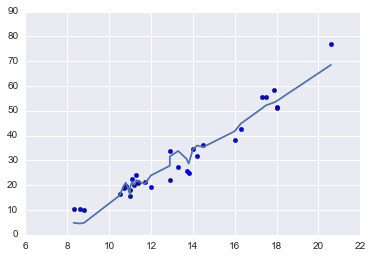

In [67]:
#A.S. We're only looking at the volume (y-axis) as a function of height (x-axis), i.e. just one variable
#but there are two variables (height, girth) that collectively yield a linear regression??
#In 3D (height, girth vs. volume) it should be a perfect line??
Ypredict=lm.predict(X)
print "MSE",np.sqrt(metrics.mean_squared_error(Y, Ypredict))
#print type(X)
from matplotlib import pyplot
pyplot.plot(X["Girth"],Ypredict)
pyplot.scatter(X["Girth"],Y)

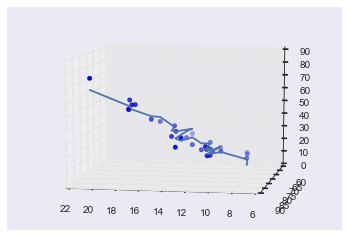

In [82]:
#A.S. testing 3D plot of the linear regression - why isn't it a straight line?
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
fig = pyplot.figure()
ax = fig.gca(projection='3d')
ax.scatter(X["Girth"],X["Height"],Y)
Z = 4.7081605030175089*X["Girth"] + 0.33925123424470144*X["Height"]
ax.plot(X["Girth"],X["Height"],Ypredict)
ax.view_init(elev = 10, azim=100)

Can we do better than this? Let us add in non linear features

In [ ]:
#since we are interested in the Volume of trees
#it's nature to add in the square of Girth into our features

#add in a new feature
trees.head()

feature_cols=["Girth", "Height","GirthSquare"]

# fit with LinearRegression
lm=LinearRegression()
lm.fit(X,Y)
#print out result
zip(feature_cols, lm.coef_)

In [ ]:
Ypredict=lm.predict(X)
#print "MSE",np.sqrt(metrics.mean_squared_error(Y, Ypredict))
from matplotlib import pyplot
pyplot.plot(X["Girth"],Ypredict)
pyplot.scatter(X["Girth"],Y)

In [ ]:
#We can keep on trying even higher order non liearn features
#A.S. Use cross validation technique (Dan's talk) to determine which terms give the best fit.
X["GirthCube"]=trees["Girth"]**3.
X["GirthFouth"]=trees["Girth"]**4.
print X.shape
feature_cols=["Girth", "Height","GirthSquare","GirthCube","GirthFouth"]
# fit with LinearRegression
lm=LinearRegression()
lm.fit(X,Y)
#print out result
zip(feature_cols, lm.coef_)

In [ ]:
Ypredict=lm.predict(X)
#print "MSE",np.sqrt(metrics.mean_squared_error(Y, Ypredict))
#print type(X)
from matplotlib import pyplot
pyplot.plot(X["Girth"],Ypredict)
pyplot.scatter(X["Girth"],Y)

## What Didn't We Cover?

- Detecting collinearity
- Diagnosing model fit
- Transforming features to fit non-linear relationships
- Interaction terms
- Assumptions of linear regression
- And so much more!

You could certainly go very deep into linear regression, and learn how to apply it really, really well. It's an excellent way to **start your modeling process** when working a regression problem. However, it is limited by the fact that it can only make good predictions if there is a **linear relationship** between the features and the response, which is why more complex methods (with higher variance and lower bias) will often outperform linear regression.

Therefore, we want you to understand linear regression conceptually, understand its strengths and weaknesses, be familiar with the terminology, and know how to apply it. However, we also want to spend time on many other machine learning models, which is why we aren't going deeper here.

## Resources

- To go much more in-depth on linear regression, read Chapter 3 of [An Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/), from which this lesson was adapted. Alternatively, watch the [related videos](http://www.dataschool.io/15-hours-of-expert-machine-learning-videos/) or read my [quick reference guide](http://www.dataschool.io/applying-and-interpreting-linear-regression/) to the key points in that chapter.
- To learn more about Statsmodels and how to interpret the output, DataRobot has some decent posts on [simple linear regression](http://www.datarobot.com/blog/ordinary-least-squares-in-python/) and [multiple linear regression](http://www.datarobot.com/blog/multiple-regression-using-statsmodels/).
- This [introduction to linear regression](http://people.duke.edu/~rnau/regintro.htm) is much more detailed and mathematically thorough, and includes lots of good advice.
- This is a relatively quick post on the [assumptions of linear regression](http://pareonline.net/getvn.asp?n=2&v=8).